In [1]:
import pandas as pd

pedidos = pd.read_excel('../data/PEDIDO-v1.xlsx')

In [2]:
pedidos.head()

,Unnamed: 0,ID_PEDIDO,DATA,VALOR_TOTAL
0,0,120210601,2021-06-01,NaN
1,1,220210601,2021-06-01,NaN
2,2,320210604,2021-06-04,NaN
3,3,420210604,2021-06-04,NaN
4,5,520210604,2021-06-04,NaN


In [3]:
# Removendo coluna Unnamed: 0
pedidos.drop(['Unnamed: 0', 'VALOR_TOTAL'], axis=1, inplace=True)

In [4]:
pedidos.describe()

,ID_PEDIDO
count,1.810000e+02
mean,7.400874e+09
std,4.281720e+09
min,1.202106e+08
25%,3.720211e+09
50%,7.320211e+09
75%,1.092021e+10
max,1.472021e+10


In [5]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_PEDIDO  181 non-null    int64 
 1   DATA       181 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


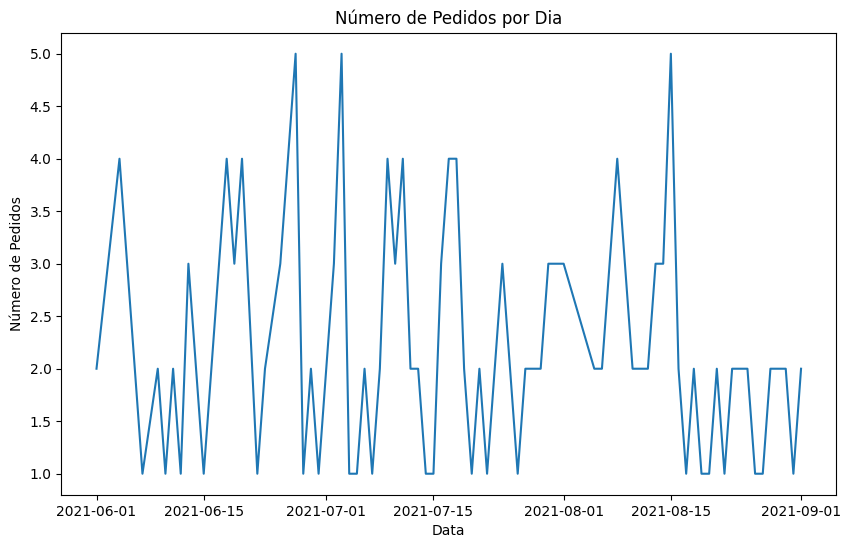

In [6]:
# Plotar gráfico de vendas por quinzenas
import matplotlib.pyplot as plt

pedidos['DATA'] = pd.to_datetime(pedidos['DATA'])

pedidos_diarios = pedidos.groupby(pedidos['DATA'].dt.date).size()

pedidos_diarios.plot(kind='line', figsize=(10, 6))
plt.title('Número de Pedidos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.show()


In [7]:
# Calcular dias com mais e menos pedidos
inicio = pd.to_datetime('2021-06-01')
fim = pd.to_datetime('2021-09-30')
pedidos_periodo = pedidos[(pedidos['DATA'] >= inicio) & (pedidos['DATA'] <= fim)]


pedidos_por_dia = pedidos_periodo.groupby(pedidos_periodo['DATA'].dt.date)['ID_PEDIDO'].nunique()

max_pedidos = pedidos_por_dia.max()
min_pedidos = pedidos_por_dia.min()

dias_com_max_pedidos = pedidos_por_dia[pedidos_por_dia == max_pedidos]
dias_com_min_pedidos = pedidos_por_dia[pedidos_por_dia == min_pedidos]

print("Dias com o maior número de pedidos:")
print(dias_com_max_pedidos)
print("\nDias com o menor número de pedidos:")
print(dias_com_min_pedidos)

Dias com o maior número de pedidos:
DATA
2021-06-27    5
2021-07-03    5
2021-08-15    5
Name: ID_PEDIDO, dtype: int64

Dias com o menor número de pedidos:
DATA
2021-06-07    1
2021-06-10    1
2021-06-12    1
2021-06-15    1
2021-06-22    1
2021-06-28    1
2021-06-30    1
2021-07-04    1
2021-07-05    1
2021-07-07    1
2021-07-14    1
2021-07-15    1
2021-07-20    1
2021-07-22    1
2021-07-26    1
2021-08-17    1
2021-08-19    1
2021-08-20    1
2021-08-22    1
2021-08-26    1
2021-08-27    1
2021-08-31    1
Name: ID_PEDIDO, dtype: int64


In [8]:
# Pedidos por mês
pedidos_por_mes = pedidos.groupby(pd.Grouper(key='DATA', freq='ME'))['ID_PEDIDO'].nunique()

print("Número de pedidos por mês:")
print(pedidos_por_mes)

Número de pedidos por mês:
DATA
2021-06-30    54
2021-07-31    71
2021-08-31    54
2021-09-30     2
Freq: ME, Name: ID_PEDIDO, dtype: int64


In [9]:
# Pedidos por semana
pedidos_por_semana = pedidos.groupby(pd.Grouper(key='DATA', freq='W'))['ID_PEDIDO'].nunique()

print("\nNúmero de pedidos por semana:")
print(pedidos_por_semana)


Número de pedidos por semana:
DATA
2021-06-06    11
2021-06-13    10
2021-06-20    14
2021-06-27    15
2021-07-04    15
2021-07-11    17
2021-07-18    17
2021-07-25    13
2021-08-01    16
2021-08-08    11
2021-08-15    15
2021-08-22    10
2021-08-29    12
2021-09-05     5
Freq: W-SUN, Name: ID_PEDIDO, dtype: int64
